In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

## Carga de datos

In [99]:
data_train = pd.read_csv("../../data/train.csv")
data_test = pd.read_csv("../../data/test.csv")

In [100]:
print("Train data dims:", data_train.shape)
print("Test data dims:", data_test.shape)

Train data dims: (4209, 378)
Test data dims: (4209, 377)


## Exploración grafica

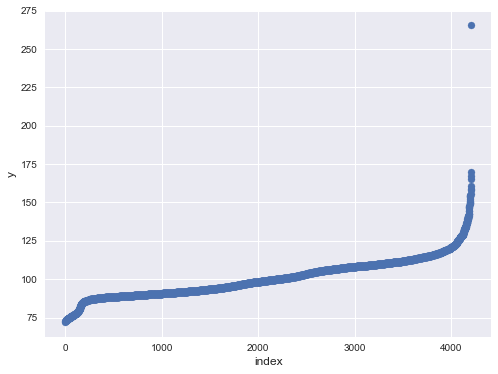

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(range(data_train.shape[0]), np.sort(data_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

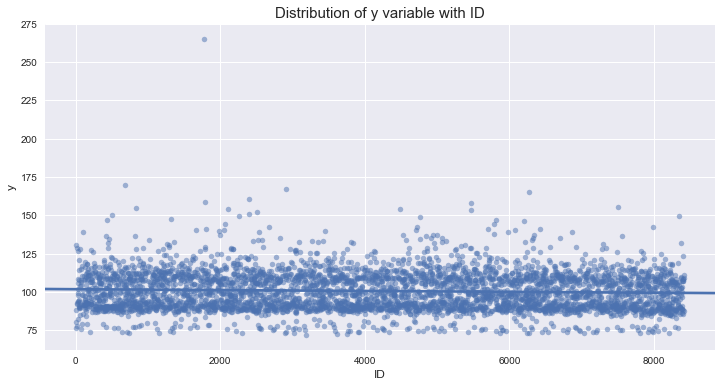

In [102]:
var_name = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=data_train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

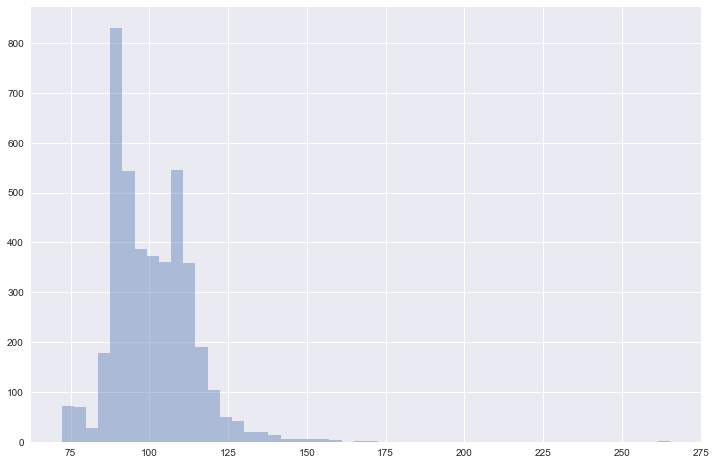

In [103]:
plt.figure(figsize=(12,8))
sns.distplot(data_train.y.values, bins=50, kde=False)

In [104]:
dtype_df = data_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [105]:
dtype_df.ix[:10,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


In [106]:
unique_values_dict = {}
for col in data_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(data_train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

Descartamos las variables que solo tienen un 0, no nos van a ser muy utiles que digamos para predecir Y.

## Codificación ONE HOT para los atributos categoricos

In [107]:
data = data_train 

Borramos el ID

In [108]:
del data['ID']

In [109]:
data.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
data = pd.get_dummies(data, prefix=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',' X8'])

In [111]:
data.head()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,130.81,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


En este punto todas las variables son toman el valor 0 o 1

Dividimos el dataset de train en 2 datasets, una parte para entrenar, otra parte para probar lo que entrenemos

In [112]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [118]:
train_x = train[train.columns[1:600]]
train_y = train[train.columns[0:1]]
test_x = test[test.columns[1:600]]
test_y = test[test.columns[0:1]]

## Simple regresión lineal

In [144]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [140]:
print("Intercept: %.2f" %regr.intercept_)
print("Mean squared error: %.2f" % np.mean((regr.predict(test_x) - test_y) ** 2))
# Explained variance score: 1 is perfect prediction
print('R-squared score: %.2f' % regr.score(test_x, test_y))

Intercept: -10621084754321.44
Mean squared error: 8172794927776191012143104.00
R-squared score: -55483822297856838991872.00


In [143]:
regr.score(test_x, test_y)

-5.5483822297856839e+22

In [137]:
train_y.shape

(3359, 1)

In [145]:
(regr.predict(test_x) - test_y)

,y
13,8.917109
14,-5.761328
41,3.496562
44,9.245547
57,1.826094
59,5.875313
61,5.769531
62,3.944844
64,3.570078
69,-14.013437
